<a href="https://colab.research.google.com/github/zuzannazak/PhD2022Bialowieza/blob/main/%F0%9F%92%96projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💖***Projekt z ekonometrii***💖

**Authors:**

Wiktoria Rakowska

Monika Wesołowska

Zuzanna Żak


**Data:**
*   Aggregated in https://github.com/zuzannazak/random-files-i-need-sometimes/blob/main/bialowieza.xls :
  *   Chrzty, śluby i zgony w parafii prawosłwanej św. Mikołaja Cudotwórcy w Białowieży https://github.com/pbiecek/SmarterPoland_blog/tree/master/dane/Bialowieza/
  *   Population data for Białowieża, rural gmina, from Bank Danych Lokalnych
  *   Population data for Poland https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/struktura-ludnosci,16,1.html 
  *   Religious practices in Poland https://cbos.pl/SPISKOM.POL/2020/K_063_20.PDF 

# ***introduction***



*   Białowieża i trochę o historii miasta
*   Fajne dane urywajace się na 2012 (tutaj można wpleść też niektóre wykresy z sekcji visualization (zmienić kolejność bloków strzałkami i wrzucić je pomiędzy bloki tekstu)
*   Projekt - dokończenie tych danych, czyli predykcja dalszych małżeństw, chrztów i zgonów
*   Dodatkowe dane: dane na temat małżeństw, urodzeń i zgonów z gminy, populacja polski, saldo migracji
*   consideration: religijność w polsce, przewidujemy rejestr kościelny (cerkiewny) więc w przypadku spadku religijności można spodziewać się spadek tych wartości w rejestrze, nawet jeśli dane cywilne tego nie pokazują



# ***package import***

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***data download***

In [ ]:
#original Białowieża data
url_data = (r'https://raw.github.com/pbiecek/SmarterPoland_blog/master/dane/Bialowieza/bialowieza.xls')
df = pd.read_excel(url_data)

df.head()

,rok,chrzest,slub,zgon
0,1878,62.0,2.0,44.0
1,1879,77.0,14.0,38.0
2,1880,79.0,14.0,60.0
3,1881,NaN,NaN,NaN
4,1882,86.0,17.0,52.0


In [ ]:
#aggregated data
url_data = (r'https://github.com/zuzannazak/random-files-i-need-sometimes/blob/49f2717618bf867b22213dd08ee8efd5ab565a1b/bialowieza.xls?raw=true')
df_aggregateddata = pd.read_excel(url_data)

df_aggregateddata.tail(10)

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
138,2016,NaN,NaN,NaN,11.0,-3.0,2205.0,38433.0,14.0,47.0,50.0,36.0,5.0
139,2017,NaN,NaN,NaN,5.0,83.0,2253.0,38434.0,10.0,45.0,49.0,37.0,5.0
140,2018,NaN,NaN,NaN,10.0,12.0,2199.0,38411.0,12.0,44.0,50.0,36.0,6.0
141,2019,NaN,NaN,NaN,13.0,-12.0,2191.0,38383.0,18.0,47.0,47.0,36.0,6.0
142,2020,NaN,NaN,NaN,7.0,-14.0,2130.0,NaN,8.0,44.0,47.0,37.0,7.0
143,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_aggregateddata.drop(df_aggregateddata.tail(5).index,inplace=True)
df_aggregateddata

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
0,1878,62.0,2.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1879,77.0,14.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,79.0,14.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1882,86.0,17.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2016,NaN,NaN,NaN,11.0,-3.0,2205.0,38433.0,14.0,47.0,50.0,36.0,5.0
139,2017,NaN,NaN,NaN,5.0,83.0,2253.0,38434.0,10.0,45.0,49.0,37.0,5.0
140,2018,NaN,NaN,NaN,10.0,12.0,2199.0,38411.0,12.0,44.0,50.0,36.0,6.0
141,2019,NaN,NaN,NaN,13.0,-12.0,2191.0,38383.0,18.0,47.0,47.0,36.0,6.0


#***data visualisation*** 

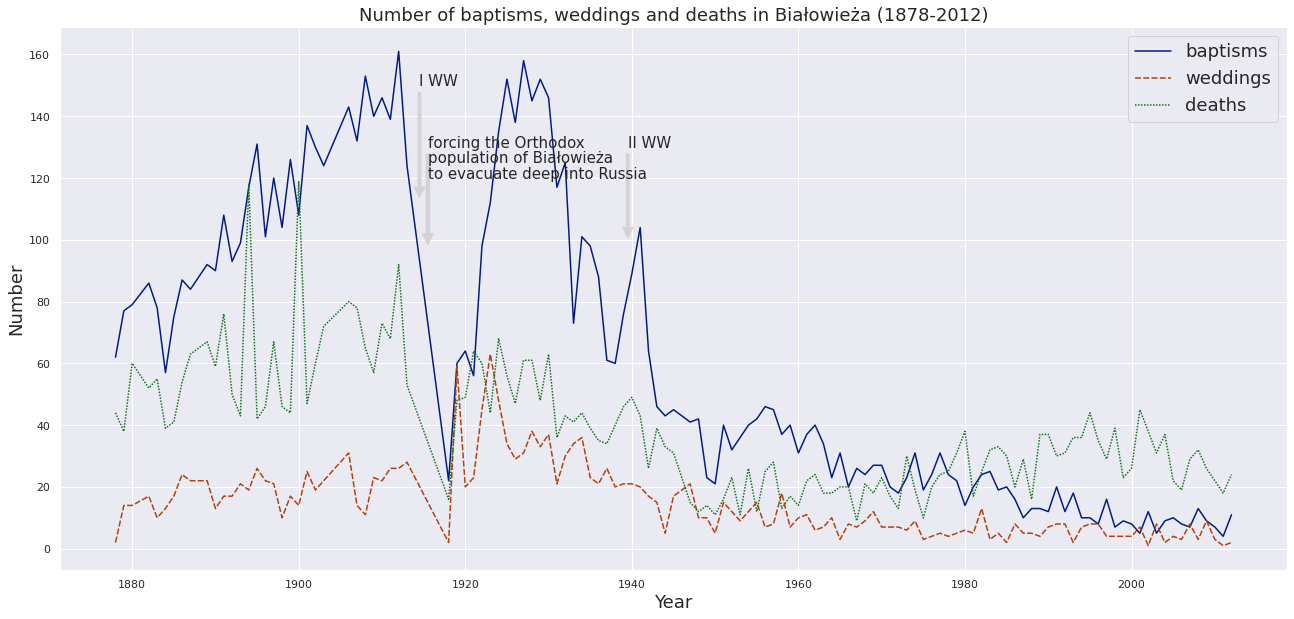

In [ ]:
url_data = (r'https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_visualisation.xlsx?raw=true')
DF = pd.read_excel(url_data)
plt.figure(figsize=(22,10))
plt.title("Number of baptisms, weddings and deaths in Białowieża (1878-2012)", fontsize=18)
g=sns.lineplot(x=DF["rok"], y=DF["liczba odnotowanych"], hue=DF["zdarzenie"], style=DF["zdarzenie"], palette='dark', legend=True, ci=True)

plt.annotate('I WW', xy=(1914.5, 113), xytext=(1914.5, 150), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('II WW', xy=(1939.5, 100), xytext=(1939.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('forcing the Orthodox', xy=(1915.5, 98), xytext=(1915.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('population of Białowieża', xy=(1915.5, 98), xytext=(1915.5, 125), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('to evacuate deep into Russia', xy=(1915.5, 98), xytext=(1915.5, 120), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.ylabel('Number', fontsize=18)
plt.xlabel('Year',fontsize=18 )
plt.legend(fontsize=18 )

sns.set_style("whitegrid")
#plt.style.use('fivethirtyeight')
sns.set_theme()



Text(0.5, 0, 'Event')

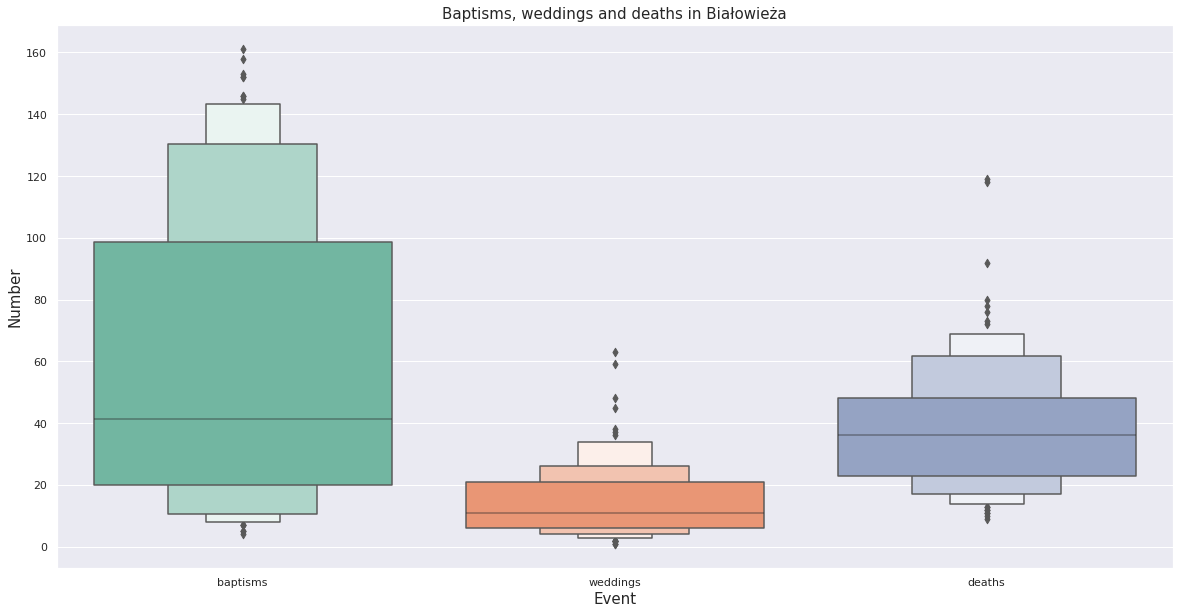

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )


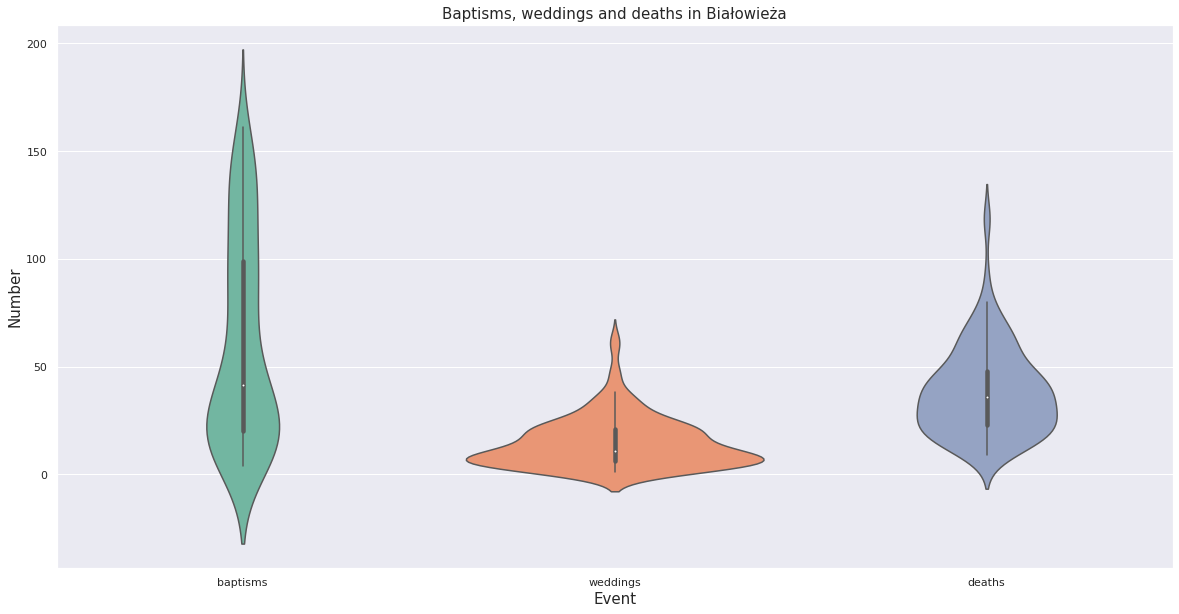

In [ ]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

plt.show()

Text(0.5, 0, 'Event')

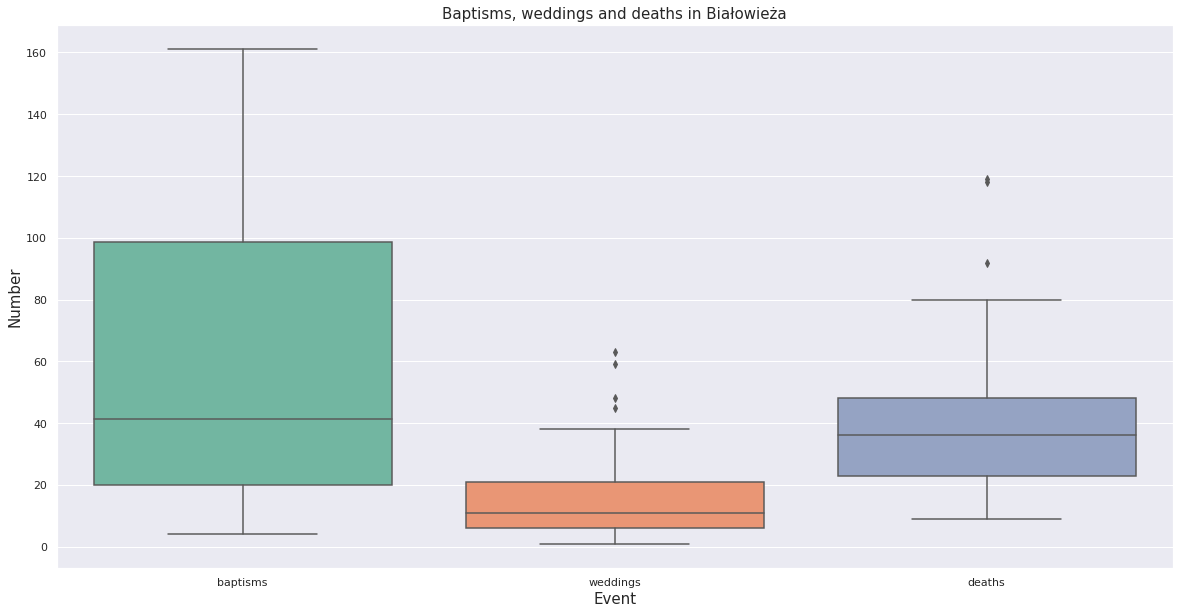

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

# ***analysis***

##***dependency analysis***

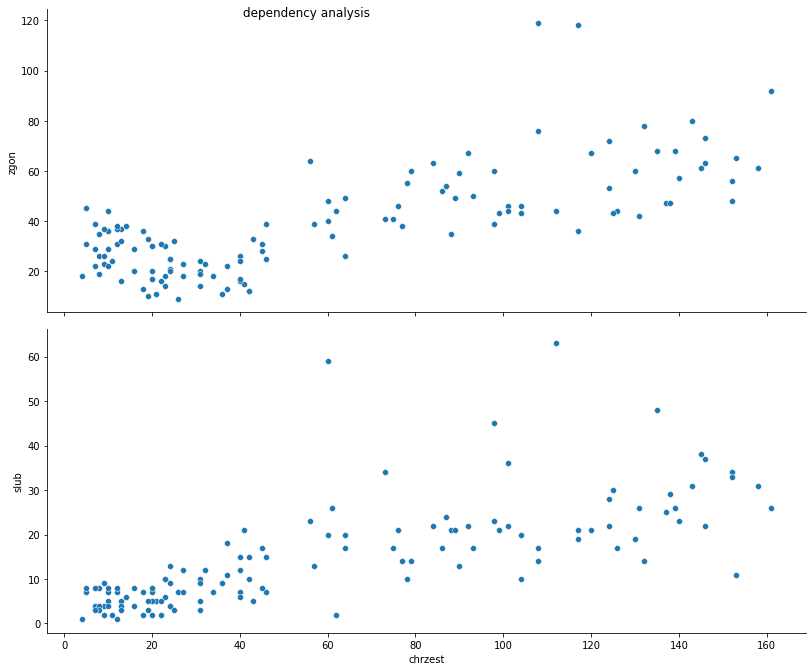

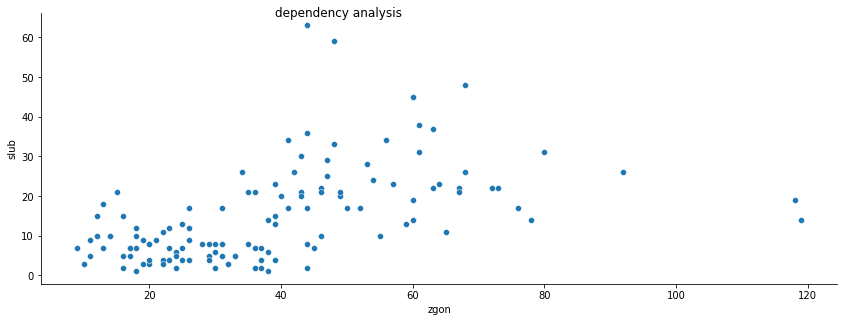

In [ ]:
g=sns.pairplot(df, x_vars=["chrzest"], y_vars=["zgon", "slub"])
g.fig.suptitle("dependency analysis")
g.fig.set_size_inches(15,10)
g=sns.pairplot(df, x_vars=["zgon"], y_vars=["slub"])
g.fig.set_size_inches(15,5)
g.fig.suptitle("dependency analysis")
sns.set_palette(sns.color_palette("Paired"))

## **correlation**

In [ ]:
#correlation
korel = df_aggregateddata.corr()
df_aggregateddata.corr()

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
rok,1.000000,-0.800298,-0.571327,-0.630441,-0.165181,0.105424,-0.978255,0.917230,-0.609959,-0.530095,-0.930674,0.897718,0.923629
chrzest,-0.800298,1.000000,0.734576,0.740269,0.326517,0.019477,0.239191,-0.861808,0.380729,0.167780,0.131010,-0.129532,-0.123442
slub,-0.571327,0.734576,1.000000,0.506627,0.379970,-0.233923,0.387479,-0.585242,0.149044,0.292203,0.149049,-0.130163,-0.348871
zgon,-0.630441,0.740269,0.506627,1.000000,-0.127775,0.072397,0.595813,0.590339,0.125313,0.830574,0.251019,-0.398130,-0.564912
GUS - Małżeństwa zawarte w gminie,-0.165181,0.326517,0.379970,-0.127775,1.000000,-0.409802,0.178516,-0.332330,0.452830,-0.081880,0.248761,-0.197831,-0.248697
GUS - saldo migracji ogółem,0.105424,0.019477,-0.233923,0.072397,-0.409802,1.000000,-0.096963,0.170489,-0.253708,0.022278,-0.104969,0.188214,0.026213
GUS - Ludność w gminie,-0.978255,0.239191,0.387479,0.595813,0.178516,-0.096963,1.000000,-0.665547,0.612382,0.565144,0.930387,-0.921283,-0.925625
GUS - Ludność w Polsce stan w dniu 31.XII (tys.),0.917230,-0.861808,-0.585242,0.590339,-0.332330,0.170489,-0.665547,1.000000,-0.272938,-0.377598,-0.749222,0.775462,0.762666
GUS - urodzenia żywe w gminie,-0.609959,0.380729,0.149044,0.125313,0.452830,-0.253708,0.612382,-0.272938,1.000000,0.359363,0.470572,-0.434410,-0.429872
GUS - zgony w gminie,-0.530095,0.167780,0.292203,0.830574,-0.081880,0.022278,0.565144,-0.377598,0.359363,1.000000,0.264394,-0.359419,-0.388005


## **filling in data gaps**
There is a large amount of data gaps in the dataset. This is mostly due to the fact that variables from other sources than 

In [ ]:
#data gaps
df_aggregateddata.isnull().sum()


rok                                                    0
chrzest                                               17
slub                                                  17
zgon                                                  17
GUS - Małżeństwa zawarte w gminie                    117
GUS - saldo migracji ogółem                          117
GUS - Ludność w gminie                               117
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)     73
GUS - urodzenia żywe w gminie                        117
GUS - zgony w gminie                                 117
CBOS - % Wierzący i praktykujący regularnie          119
CBOS - % Wierzący i praktykujący nieregularnie       119
CBOS - % Niewierzący i niepraktykujący               119
dtype: int64

In [ ]:
CORREL = df_aggregateddata.corr()
CORREL['chrzest'].to_frame().sort_values('chrzest')
CORREL = df_aggregateddata.corr()
CORREL['slub'].to_frame().sort_values('slub')
CORREL = df_aggregateddata.corr()
CORREL['zgon'].to_frame().sort_values('zgon')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Małżeństwa zawarte w gminie'].to_frame().sort_values('GUS - Małżeństwa zawarte w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - saldo migracji ogółem'].to_frame().sort_values('GUS - saldo migracji ogółem')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Ludność w gminie'].to_frame().sort_values('GUS - Ludność w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].to_frame().sort_values('GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)')
CORREL = df_aggregateddata.corr()
CORREL['GUS - urodzenia żywe w gminie'].to_frame().sort_values('GUS - urodzenia żywe w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - zgony w gminie'].to_frame().sort_values('GUS - zgony w gminie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Wierzący i praktykujący regularnie'].to_frame().sort_values('CBOS - % Wierzący i praktykujący regularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Wierzący i praktykujący nieregularnie'].to_frame().sort_values('CBOS - % Wierzący i praktykujący nieregularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Niewierzący i niepraktykujący'].to_frame().sort_values('CBOS - % Niewierzący i niepraktykujący')

,CBOS - % Niewierzący i niepraktykujący
CBOS - % Wierzący i praktykujący regularnie,-0.940103
GUS - Ludność w gminie,-0.925625
zgon,-0.564912
GUS - urodzenia żywe w gminie,-0.429872
GUS - zgony w gminie,-0.388005
slub,-0.348871
GUS - Małżeństwa zawarte w gminie,-0.248697
chrzest,-0.123442
GUS - saldo migracji ogółem,0.026213
GUS - Ludność w Polsce stan w dniu 31.XII (tys.),0.762666


In [ ]:
df_aggregateddata['chrzest'] = df_aggregateddata.groupby('zgon')['chrzest'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['chrzest'].fillna(method='ffill', inplace=True)  
df_aggregateddata['zgon'] = df_aggregateddata.groupby('GUS - zgony w gminie')['zgon'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['zgon'].fillna(method='ffill', inplace=True)  
df_aggregateddata['slub'] = df_aggregateddata.groupby('chrzest')['slub'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['slub'].fillna(method='ffill', inplace=True)  
df_aggregateddata['GUS - Małżeństwa zawarte w gminie'] = df_aggregateddata.groupby('GUS - urodzenia żywe w gminie')['GUS - Małżeństwa zawarte w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Małżeństwa zawarte w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - saldo migracji ogółem'] = df_aggregateddata.groupby('GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)')['GUS - saldo migracji ogółem'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - saldo migracji ogółem'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - Ludność w gminie'] = df_aggregateddata.groupby('CBOS - % Wierzący i praktykujący regularnie')['GUS - Ludność w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Ludność w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'] = df_aggregateddata.groupby('rok')['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - urodzenia żywe w gminie'] = df_aggregateddata.groupby('GUS - Ludność w gminie')['GUS - urodzenia żywe w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - urodzenia żywe w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - zgony w gminie'] = df_aggregateddata.groupby('zgon')['GUS - zgony w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - zgony w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Wierzący i praktykujący regularnie'] = df_aggregateddata.groupby('GUS - Ludność w gminie')['CBOS - % Wierzący i praktykujący regularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Wierzący i praktykujący regularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Wierzący i praktykujący nieregularnie'] = df_aggregateddata.groupby('CBOS - % Niewierzący i niepraktykujący')['CBOS - % Wierzący i praktykujący nieregularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Wierzący i praktykujący nieregularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Niewierzący i niepraktykujący'] = df_aggregateddata.groupby('rok')['CBOS - % Niewierzący i niepraktykujący'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Niewierzący i niepraktykujący'].fillna(method='ffill', inplace=True) 


df_aggregateddata.to_csv(r'fillna_data_bialowieza.csv', index = False)

In [ ]:
df_aggregateddata.isnull().sum()

rok                                                    0
chrzest                                                0
slub                                                   0
zgon                                                 117
GUS - Małżeństwa zawarte w gminie                    117
GUS - saldo migracji ogółem                          117
GUS - Ludność w gminie                               119
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)     72
GUS - urodzenia żywe w gminie                        119
GUS - zgony w gminie                                 117
CBOS - % Wierzący i praktykujący regularnie          119
CBOS - % Wierzący i praktykujący nieregularnie       119
CBOS - % Niewierzący i niepraktykujący               119
dtype: int64

In [ ]:
df_aggregateddata.dropna(inplace=True)
df_aggregateddata.to_csv(r'df_bialowieza.csv', index = False)

In [ ]:
df_aggregateddata

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
119,1997,16.0,4.0,29.0,14.0,-9.0,2938.0,38290.0,39.0,50.0,56.0,32.0,3.0
120,1998,7.0,4.0,39.0,9.0,5.0,2919.0,38277.0,20.0,55.0,57.0,32.0,3.0
121,1999,9.0,4.0,23.0,12.0,10.0,2787.0,38263.0,21.0,43.0,58.0,32.0,3.0
122,2000,8.0,4.0,26.0,10.0,5.0,2697.0,38254.0,23.0,45.0,58.0,32.0,3.0
123,2001,5.0,7.0,45.0,13.0,-14.0,2747.0,38242.0,25.0,52.0,55.0,33.0,3.0
124,2002,12.0,1.0,38.0,10.0,4.0,2714.0,38219.0,11.0,53.0,56.0,32.0,3.0
125,2003,5.0,8.0,31.0,9.0,12.0,2687.0,38191.0,6.0,41.0,55.0,32.0,3.0
126,2004,9.0,2.0,37.0,6.0,22.0,2671.0,38174.0,18.0,60.0,56.0,31.0,3.0
127,2005,10.0,4.0,22.0,11.0,-3.0,2707.0,38157.0,18.0,34.0,58.0,32.0,3.0
128,2006,8.0,3.0,19.0,12.0,3.0,2664.0,38125.0,20.0,41.0,56.0,32.0,4.0


## **Regression**

In [ ]:
X = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y = df_aggregateddata["chrzest"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1.209
Date:                Wed, 26 Jan 2022   Prob (F-statistic):              0.380
Time:                        07:29:01   Log-Likelihood:                -47.872
No. Observations:                  24   AIC:                             121.7
Df Residuals:                      11   BIC:                             137.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

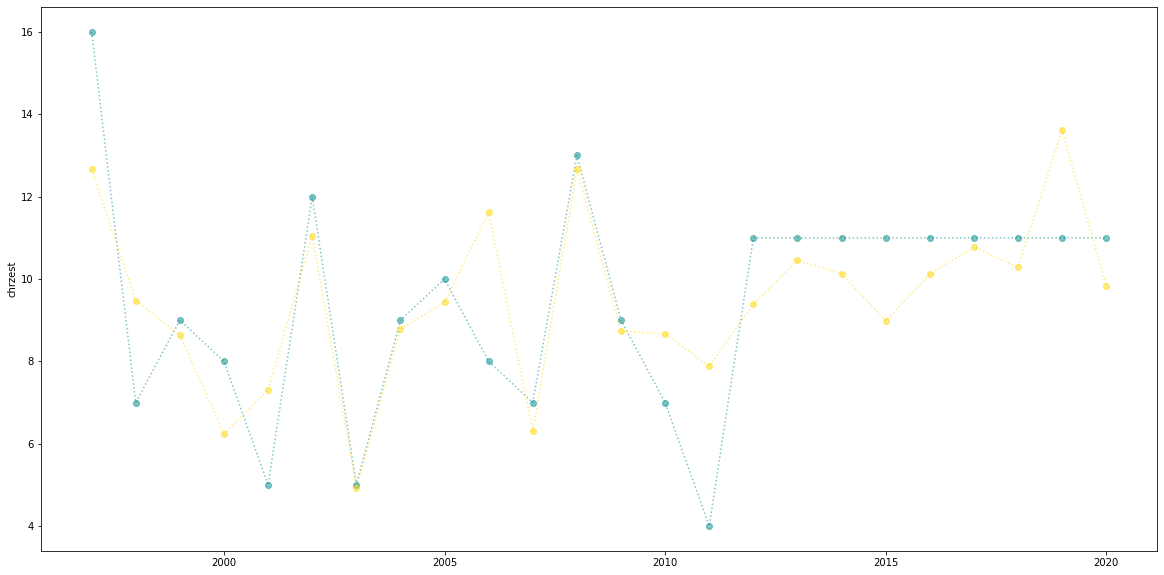

In [ ]:
df_aggregateddata['Y_pred'] = Y_pred
fig, ax = plt.subplots()
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["chrzest"],marker='o', color="darkcyan",alpha=0.5, linestyle='dotted')
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["Y_pred"],marker='o', color="gold",alpha=0.5, linestyle='dotted')
ax.set_ylabel('chrzest')
fig.set_size_inches(20, 10)

## **PCA**


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("AMR")
install.packages("readr")
install.packages("readxl")
install.packages("devtools")
install.packages("ggplot2")

In [ ]:
%%R
library(AMR)
library(readr)
library(readxl)
library(devtools)
library(ggplot2)

R[write to console]: Loading required package: usethis



In [ ]:
%%R
df_PCA <- read_csv("df_bialowieza.csv")

Rows: 24 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): rok, chrzest, slub, zgon, GUS - Małżeństwa zawarte w gminie, GUS -...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
summary(df_PCA)

      rok          chrzest           slub            zgon     
 Min.   :1997   Min.   : 4.00   Min.   :1.000   Min.   :18.0  
 1st Qu.:2003   1st Qu.: 7.75   1st Qu.:2.000   1st Qu.:24.0  
 Median :2008   Median :10.50   Median :2.500   Median :26.0  
 Mean   :2008   Mean   : 9.50   Mean   :3.458   Mean   :27.5  
 3rd Qu.:2014   3rd Qu.:11.00   3rd Qu.:4.000   3rd Qu.:29.5  
 Max.   :2020   Max.   :16.00   Max.   :9.000   Max.   :45.0  
 GUS - Małżeństwa zawarte w gminie GUS - saldo migracji ogółem
 Min.   : 5.00                     Min.   :-27.000            
 1st Qu.: 9.00                     1st Qu.: -6.000            
 Median :11.00                     Median :  3.500            
 Mean   :10.79                     Mean   :  4.792            
 3rd Qu.:13.00                     3rd Qu.: 10.250            
 Max.   :18.00                     Max.   : 83.000            
 GUS - Ludność w gminie GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)
 Min.   :2130           Min.   :38116       

In [ ]:
%%R
cor(df_PCA)

                                                         rok     chrzest
rok                                                1.0000000  0.22449988
chrzest                                            0.2244999  1.00000000
slub                                              -0.4321265 -0.41637422
zgon                                              -0.4648515 -0.08128855
GUS - Małżeństwa zawarte w gminie                 -0.2247524  0.14064745
GUS - saldo migracji ogółem                        0.1456564  0.08218159
GUS - Ludność w gminie                            -0.9725013 -0.14989587
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.5971602  0.09659023
GUS - urodzenia żywe w gminie                     -0.5731061  0.14715552
GUS - zgony w gminie                              -0.3467813  0.06800070
CBOS - % Wierzący i praktykujący regularnie       -0.9306745 -0.24625279
CBOS - % Wierzący i praktykujący nieregularnie     0.8977182  0.20432575
CBOS - % Niewierzący i niepraktykujący             

In [ ]:
%%R
pc <- prcomp(df_PCA, center = TRUE, scale = FALSE)
summary(pc)

Importance of components:
                            PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     275.9265 92.4753 20.2221 7.49359 5.91409 3.27465 2.72248
Proportion of Variance   0.8935  0.1004  0.0048 0.00066 0.00041 0.00013 0.00009
Cumulative Proportion    0.8935  0.9938  0.9986 0.99928 0.99969 0.99982 0.99991
                           PC8     PC9    PC10    PC11   PC12   PC13
Standard deviation     1.99317 1.52888 0.97872 0.69220 0.4741 0.2833
Proportion of Variance 0.00005 0.00003 0.00001 0.00001 0.0000 0.0000
Cumulative Proportion  0.99995 0.99998 0.99999 1.00000 1.0000 1.0000


In [ ]:
%%R
pc

Standard deviations (1, .., p=13):
 [1] 275.9264675  92.4752533  20.2220896   7.4935915   5.9140933   3.2746487
 [7]   2.7224838   1.9931722   1.5288833   0.9787185   0.6921954   0.4740936
[13]   0.2833238

Rotation (n x k) = (13 x 13):
                                                           PC1           PC2
rok                                                0.024069313 -2.200931e-02
chrzest                                            0.001461658 -1.125873e-03
slub                                              -0.004299380 -7.025104e-03
zgon                                              -0.012222536 -9.246949e-04
GUS - Małżeństwa zawarte w gminie                 -0.003295828 -7.873499e-03
GUS - saldo migracji ogółem                        0.010765942  1.423118e-02
GUS - Ludność w gminie                            -0.904526378  4.243270e-01
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.424788262  9.047537e-01
GUS - urodzenia żywe w gminie                     -0.014011411  2.0787

In [ ]:
%%R
df.detr.pc <- prcomp(df_PCA, center = TRUE, scale = TRUE)
summary(df.detr.pc)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.555 1.3088 1.1939 1.07696 0.88503 0.76866 0.5746
Proportion of Variance 0.502 0.1318 0.1096 0.08922 0.06025 0.04545 0.0254
Cumulative Proportion  0.502 0.6338 0.7435 0.83268 0.89293 0.93838 0.9638
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.47604 0.34116 0.22893 0.20738 0.15588 0.09054
Proportion of Variance 0.01743 0.00895 0.00403 0.00331 0.00187 0.00063
Cumulative Proportion  0.98121 0.99016 0.99419 0.99750 0.99937 1.00000


In [ ]:
%%R
df.detr.pc

Standard deviations (1, .., p=13):
 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082

Rotation (n x k) = (13 x 13):
                                                          PC1          PC2
rok                                                0.36580938  0.044977885
chrzest                                            0.08794661  0.030222182
slub                                              -0.23377372  0.289829391
zgon                                              -0.22072949 -0.351934213
GUS - Małżeństwa zawarte w gminie                 -0.14293424  0.581549442
GUS - saldo migracji ogółem                        0.08625071 -0.456295055
GUS - Ludność w gminie                            -0.37636039 -0.057669019
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.31597810 -0.006439592
GUS - urodzenia żywe w gminie                     -0.22186960  0.268182280
GUS - zgony w gminie      

In [ ]:
%%R
df.detr.pc$sdev


 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082


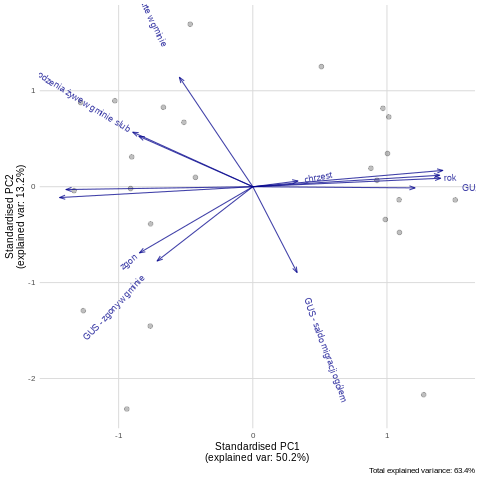

In [ ]:
%%R
ggplot_pca(df.detr.pc)

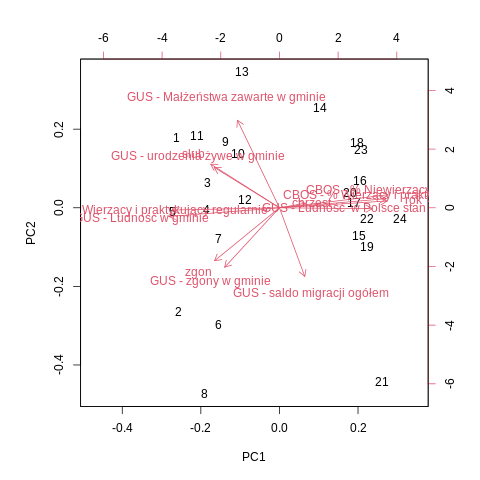

In [ ]:
%%R
biplot(df.detr.pc)

## Factor analysis

In [ ]:
%%R 
install.packages("psych")

In [ ]:
%%R
library(psych)

R[write to console]: 
Attaching package: ‘psych’


R[write to console]: The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


R[write to console]: The following object is masked from ‘package:AMR’:

    pca




In [ ]:
%%R

EFA_Model <- fa(df_PCA)
print(EFA_Model)

Factor Analysis using method =  minres
Call: fa(r = df_PCA)
Standardized loadings (pattern matrix) based upon correlation matrix
                                                    MR1    h2    u2 com
rok                                               -0.94 0.884 0.116   1
chrzest                                           -0.20 0.039 0.961   1
slub                                               0.54 0.291 0.709   1
zgon                                               0.51 0.258 0.742   1
GUS - Małżeństwa zawarte w gminie                  0.32 0.100 0.900   1
GUS - saldo migracji ogółem                       -0.19 0.035 0.965   1
GUS - Ludność w gminie                             0.98 0.955 0.045   1
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.) -0.77 0.595 0.405   1
GUS - urodzenia żywe w gminie                      0.51 0.263 0.737   1
GUS - zgony w gminie                               0.42 0.179 0.821   1
CBOS - % Wierzący i praktykujący regularnie        0.94 0.876 0.124   1
CBOS - 

In [ ]:
%%R
EFA_Model$loadings


Loadings:
                                                  MR1   
rok                                               -0.940
chrzest                                           -0.198
slub                                               0.540
zgon                                               0.508
GUS - Małżeństwa zawarte w gminie                  0.316
GUS - saldo migracji ogółem                       -0.187
GUS - Ludność w gminie                             0.977
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.) -0.771
GUS - urodzenia żywe w gminie                      0.513
GUS - zgony w gminie                               0.423
CBOS - % Wierzący i praktykujący regularnie        0.936
CBOS - % Wierzący i praktykujący nieregularnie    -0.934
CBOS - % Niewierzący i niepraktykujący            -0.955

                 MR1
SS loadings    6.260
Proportion Var 0.482


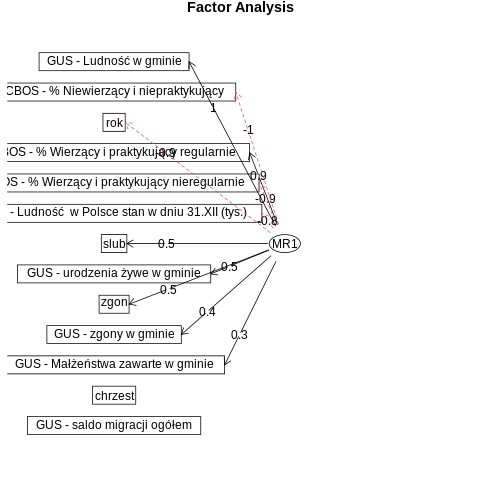

In [ ]:
%%R
fa.diagram(EFA_Model)


In [ ]:
%%R
summary(EFA_Model$scores)

      MR1         
 Min.   :-1.6840  
 1st Qu.:-0.8731  
 Median : 0.2138  
 Mean   : 0.0000  
 3rd Qu.: 0.9011  
 Max.   : 1.6100  


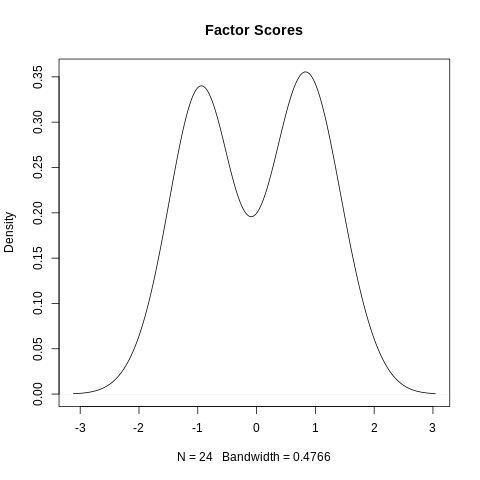

In [ ]:
%%R
plot(density(EFA_Model$scores, na.rm = TRUE), 
     main = "Factor Scores")

In [ ]:
%%R
N <- nrow(df_PCA)
indices <- seq(1, N)

indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!c(indices %in% indices_EFA)]

fa_EFA <- fa[indices_EFA, ]
fa_CFA <- fa[indices_CFA, ]

R[write to console]: Error in fa[indices_EFA, ] : object of type 'closure' is not subsettable




Error in fa[indices_EFA, ] : object of type 'closure' is not subsettable


RInterpreterError: ignored

#***appendix***

## **SNN**

In [ ]:
X_SNN = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y_SNN = df_aggregateddata["chrzest"].values.reshape(-1,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X_SNN, Y_SNN, test_size=0.33, random_state=42)

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.10, random_state=1)

In [ ]:
clf = MLPRegressor(solver='adam', learning_rate='adaptive', alpha=1e-5, activation='relu', hidden_layer_sizes=(5,5,5), random_state=2, max_iter=500, batch_size=62)

In [ ]:
clf.fit(X_train, Y_train.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(alpha=1e-05, batch_size=62, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive', max_iter=500, random_state=2)

In [ ]:
MSE = mean_squared_error(clf.predict(X_test), Y_test.flatten())
RMSE = np.sqrt(MSE)
RMSE

10.420717544683248

In [ ]:
mean_absolute_percentage_error(clf.predict(X_test), Y_test.flatten())

35.578558617443974

In [ ]:
R_kw = r2_score(Y_test.flatten(), clf.predict(X_test))
R_kw

-8.748849748774296

In [ ]:
clf.predict(X_test)

array([ 0.22185018,  0.22185018, -0.45149812,  0.22185018, -0.39409749,
        0.22185018])

In [ ]:
print(f'Predicted value of the observation 4 : {clf.predict(X_test)[3]}')

Predicted value of the observation 4 : 0.2218501837101626


In [ ]:
Y_test[3]

array([10.])